In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)
sns.set_theme(style="ticks", color_codes=True)

datapath = 'C:\\Users\\MrBrito\\Documents\\_Grad School\\Rotations\\Satra\\egemaps analysis\\egemaps_vector_both.csv'
egm = pd.read_csv(datapath)#extract all the egemaps data from the csv


In [10]:
def extract_N_scale(dataframe,nFeatures):
    #pull just the numerical data from the number of features in egemaps (88), ignores metadata
    data_unscaled = dataframe.iloc[:,0:nFeatures]
    #scale data: feature data - mean of feature data/variance of feature data
    data = (data_unscaled - data_unscaled.mean())/data_unscaled.std(ddof=0)
    #data = np.divide((data_unscaled - np.mean(data_unscaled, axis=0)),np.std(data_unscaled, axis=0))
    return data

In [128]:
#Split the data based on diagnosis. norm is 'target'= 0, VFP is 'target' = 1. Just extract vowel data too
egm_Norm = egm[egm['target']== 0]
vow = egm_Norm[egm_Norm["token"].apply(lambda x: 'Vowel' in x)]
#egm_VFP = egm[egm['target']== 1]

#removes metadata and normalizes each dataset
Norm = extract_N_scale(vow, 88)
#VFP = extract_N_scale(egm_VFP, 88)


<AxesSubplot:xlabel='PCs', ylabel='%variance'>

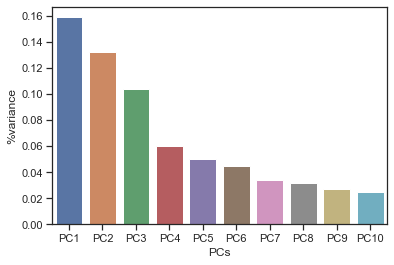

In [129]:
pca = PCA(n_components=88)
screeNorm = pd.DataFrame(pca.fit(Norm).explained_variance_ratio_)
#screeVFP = pd.DataFrame(pca.fit(VFP).explained_variance_ratio_)

screeNorm['PCs']=['PC' + str(i) for i in np.arange(screeNorm.index.size)+1]
screeNorm.columns= ['%variance', 'PCs']
sns.barplot(x="PCs", y="%variance", data=screeNorm[0:10])


#X = np.arange(88)+1
#Y = pca.components_[:,0]
#fig, ax = plt.subplots()
#sc = plt.scatter(x=X, y=Y)
#egm_Norm.iloc[:,np.argmax(Y)]